# Pyber Observations

1. On average taking an Uber in a Rural or Suburban area is typically more expensive because there are less drivers per city and less rides requested.
2. 68% of Uber rides occur in an urban city.
3. Less than 20% of the drivers opperate in rural and suburban cities. 80% of the drivers are picking up rides in urban cities.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
#import warning
import pandas as pd
import numpy as np
from matplotlib import cm


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
# Read the Rider Data
rider_info = pd.read_csv(ride_data_to_load)

# Read the City and Ride Data
city_info = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
city_ride_data_merge = pd.merge(rider_info, city_info, on="city", how="left")

# Display the data table for preview
city_ride_data_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [4]:
city_ride_data = city_ride_data_merge.groupby(['type','city','driver_count'])
print(city_ride_data)

In [5]:
#Calculations to define x & y axis variables:

#y_axis = Average Fare by City
y_axis = city_ride_data['fare'].mean()

#x_axis = number riders per city
x_axis = city_ride_data['fare'].count()

# Develop Dataframe with calcuations
city_ride_cal_df = pd.DataFrame({"Number of Rides Per City":x_axis,
                                 "Average Fare per city":y_axis})
#reset index to call driver_count list
city_ride_cal_df = city_ride_cal_df.reset_index()

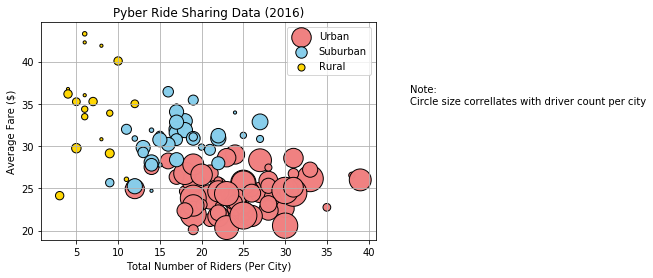

In [6]:
types=['Urban','Suburban','Rural']
colors=['lightcoral','skyblue','gold']
colors
for t, c in zip(types, colors):
    plt_df =city_ride_cal_df[city_ride_cal_df['type'] == t]
    plt.scatter(plt_df['Number of Rides Per City'],
               plt_df['Average Fare per city'],
               marker ="o",
               alpha = 0.99,
               s=plt_df['driver_count']*10,
               c=c,
               edgecolor='black',
               label=t)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(['Urban','Suburban','Rural'])

# Incorporate a text label regarding circle size
plt.text(45,35,"Note:\nCircle size correllates with driver count per city")

# Save Figure
plt.savefig("Image.bubblepyber.png")

plt.show()

In [7]:
#plt.xlim(0,42)
#plt.ylim(0,50)

# Obtain the x and y coordinates for each of the three city types

#df_urban = city_ride_cal_df.loc[city_ride_cal_df['type'] == 'Urban']
#df_rural = city_ride_cal_df.loc[city_ride_cal_df['type'] == 'Rural']
#df_Suburan = city_ride_cal_df.loc[city_ride_cal_df['type'] == 'Suburan']

#x_urban = df_urban['Number of Rides Per City']
#y_urban = df_urban['Average Fare per city']
#s_urban = df_urban['driver_count']

#x_suburban = df_Suburan['Number of Rides Per City']
#y_suburban = df_Suburan['Average Fare per city']
#s_suburban = df_Suburan['driver_count']

#x_rural = df_rural['Number of Rides Per City']
#y_rural = df_rural['Average Fare per city']
#s_rural = df_rural['driver_count']

# Build the scatter plots for each city types
#plt.scatter(x_urban, y_urban, s_urban*10, facecolors="lightcoral", edgecolors="black",alpha=0.99)
#plt.scatter(x_suburban, y_suburban, s_suburban**10, facecolors="skyblue", edgecolors="black",alpha=0.99)
#plt.scatter(x_rural, y_rural, s_rural*10, facecolors="gold", edgecolors="black",alpha=0.99)

# Incorporate the other graph properties
#plt.title("Pyber Ride Sharing Data (2016)")
#plt.xlabel("Total Number of Riders (Per City)")
#plt.ylabel("Average Fare ($)")
#plt.grid()

# Create a legend
#plt.legend(['Urban','Suburban','Rural'])

# Incorporate a text label regarding circle size
#plt.text(45,35,"Note:\nCircle size correllates with driver count per city")

# Save Figure
#plt.savefig("Image.bubblepyber.png")

#plt.show()

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

In [9]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [10]:
labels = ['Rural','Suburan','Urban']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

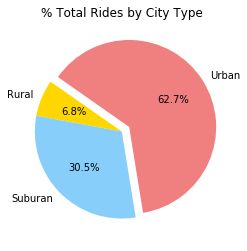

In [11]:
# Calculate Ride Percents
TF = city_ride_data_merge['fare'].sum()
Type_Group = city_ride_data_merge.groupby('type')
print(Type_Group)
Total_group_type = Type_Group["fare"].sum()
FP = (Total_group_type/TF)

# Build Pie Chart
plt.pie(FP, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", pctdistance=0.6, shadow=False, 
        labeldistance=1.1, startangle=145, radius=None, counterclock=True, wedgeprops=None, textprops=None, 
        center=(0, 0), frame=False, rotatelabels=False)

# Incorporate the other graph properties
plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig("Image.TotalRidesPie.png")

# Show Figure
plt.show()

In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

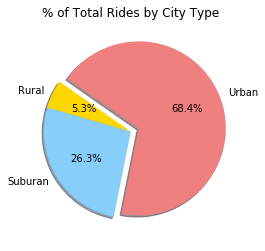

In [13]:
# Calculate Ride Percents
TR =city_ride_data_merge.count()['fare']
total_rides_per_type = (city_ride_data_merge.groupby('type').count()/TR)*100
TTR=total_rides_per_type['ride_id']
# Build Pie Chart
plt.pie(TTR, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", pctdistance=0.6, shadow=True, 
        labeldistance=1.1, startangle=145, radius=None, counterclock=True, wedgeprops=None, textprops=None, 
        center=(0, 0), frame=False, rotatelabels=False)

# Incorporate the other graph properties
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images.TotalRidesPie.png")

# Show Figure
plt.show()

In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

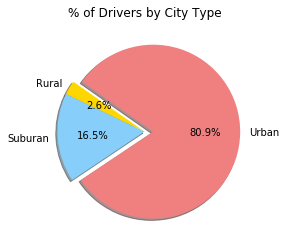

In [15]:
# Calculate Ride Percents
driver_group = city_info.groupby('type')
TD = driver_group['driver_count'].sum()

# Build Pie Chart
plt.pie(TD, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", pctdistance=0.6, shadow=True, 
        labeldistance=1.1, startangle=145, radius=None, counterclock=True, wedgeprops=None, textprops=None, 
        center=(0, 0), frame=False, rotatelabels=False)

# Incorporate the other graph properties
plt.title("% of Drivers by City Type")

# Save Figure
plt.savefig("Images.DrivesbyCityPie.png")

# Show Figure
plt.show()

In [16]:
# Show Figure
plt.show()